 In this Lab, we will test several models to predict the success of telemarketing calls for selling long-term bank deposits. A Portuguese retail bank was addressed, with data collected from 2008 to 2013, thus including the effects of the recent financial crisis. For more check out <a href="https://www.coursera.org/learn/machine-learning-with-python"> Machine Learning with Python</a>


# Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Data Analysis </a></li>
<li><a href="#ref1">K-Nearest Neighbors</a></li>
<li><a href="#ref2">Logistic Regression</a></li>
<li><a href="#ref3">Support Vector Machines</a></li>

<p></p>

</div>

<hr>

 Import Libraries 

In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
import itertools
%matplotlib inline  

Function plot Confusion Matrix 
<a id="plotmatrix"></a>

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



 Function used to display and save metrics:
<a id=pretty_metrics></a>

In [4]:
def pretty_metrics(precision_recall_fscore=0,accuracy_score=0):
    if precision_recall_fscore==0:
        metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
        return metric_dict
    #This function prints out the precision, recall,f-score and accuracy is also saves the result to a dictionary 
    metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
    metric_dict['accuracy']=accuracy_score
    metric_dict['precision']=precision_recall_fscore[0][1]
    metric_dict['recall']=precision_recall_fscore[1][1]
    metric_dict['F1']=precision_recall_fscore[2][1]
    [print(key,value) for key, value in metric_dict.items()]
    return metric_dict

# <a id="ref0"></a> Data Analysis 


In [95]:
data_file='https://raw.githubusercontent.com/jsantarc/ADMN5016_2022/master/data/bank-additional-full.csv'
bank_data=pd.read_csv(data_file,sep=";")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### The following table describes the features or what data the columns contain 

<table style="width:500%">
 <!-- first row of table  -->
  
  <tr>
    <th>Symbol</th>
    <th>Feature description</th>  
  </tr>
   <!-- 1st  row of table  -->
   <tr>
    <td>age</td>
    <td>age </td> 
    
  </tr>
  <!-- 2nd   row of table  -->
  <tr>
    <td>job </td>
    <td>type of job  </td> 
    
  </tr>
  <!-- 3 rd  row of table  -->
  <tr>
    <td>education</td>
    <td>education</td> 
  </tr>
    <!-- 4th  row of table  -->
  <tr>
    <td>default</td>
    <td>has credit in default</td> 
  </tr>
     <!-- 5th  row of table  -->
  <tr>
    <td>default</td>
    <td>has credit in default</td> 
  </tr>
   <tr>
     <!-- 6th  row of table  -->
    <td>balance</td>
    <td>average yearly balance (euros)</td> 
  </tr>
  
   <tr>
     <!-- 7th  row of table  -->
    <td>housing</td>
    <td>has housing loan</td> 
  </tr>
    <tr>
     <!-- 8th  row of table  -->
    <td>loan</td>
    <td>has personal loan</td>     
  </tr>
 <tr>
     <!-- 9 th  row of table  -->
    <td>contact*</td>
    <td>contact communication type</td>     
  </tr> 
  <tr>
     <!-- 10 th  row of table  -->
    <td>day*</td>
    <td>last contact day of the month </td>     
  </tr> 
    <tr>
     <!-- 11 th  row of table  -->
    <td>mouth*</td>
    <td>last contact day of the month </td>     
  </tr> 
  <tr>
     <!-- 12 th  row of table  -->
    <td>duration*</td>
    <td>last contact duration, in seconds </td>     
   </tr>
  <tr>
     <!-- 13 th  row of table  -->
    <td>campaign*</td>
    <td>number of contacts </td>     
   </tr>
 <tr>
     <!-- 14 th  row of table  -->
    <td>pdays*</td>
    <td> days  client was last contacted </td>     
   </tr>
   <tr>
     <!-- 15 th  row of table  -->
    <td>previous*</td>
    <td> days  client was last contacted </td>     
   </tr>
     <!-- 16 th  row of table  -->
    <td>poutcome*</td>
    <td> outcome of previous marketing campaign  </td>     
   </tr>
   <tr>
     <!-- 17 th  row of table  -->
    <td>y</td>
    <td> client subscribed(target) </td>     
   </tr>
   
   
   
</table>

#### lets get the data's shape 

In [96]:
bank_data.shape

(41188, 21)

41188 rows and 21 columns, this means we 41188 samples. The 21 columns means we have 21 columns of data. We can use the method **info()**  to examen what kind of data we have.

 Let's see if there is any missing data 

In [7]:
bank_data.isnull().values.sum()

0

 Let's see the type of data in each column 


In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We have 41188 non-null, this means we are not missing any data, the columns with **int64** are integers, the columns with **float64** are floats and the column  with an **object**  are in this case strings. Let's use the method  **describe()** to get a better understanding of the data. The count is the number of data points, the mean or average, the std row shows the standard deviation. The 25%, 50%, and 75% .

In [9]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


 We can use the method  **.hist()** to display a histogram of the numerical features. 

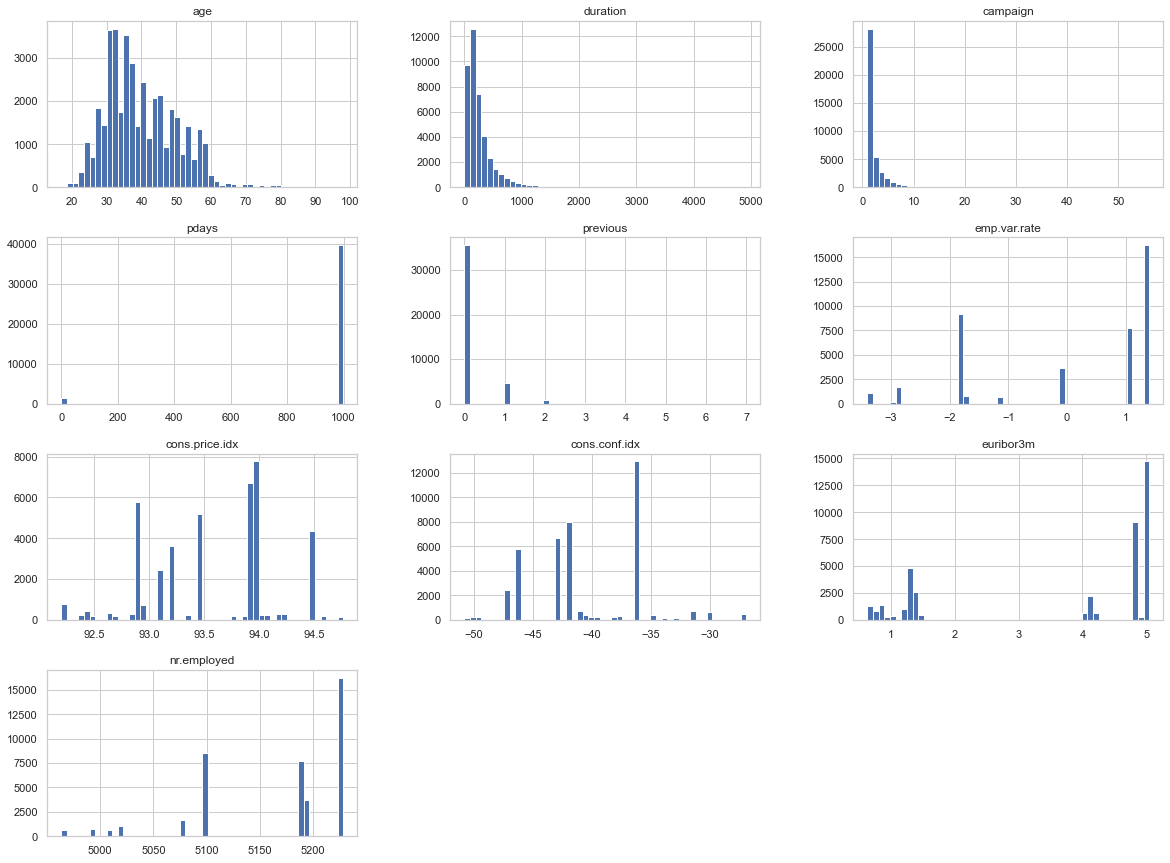

In [10]:
bank_data.hist(bins=50, figsize=(20,15))
plt.show()

 We can extract the name of the columns with the data type "object"  

In [11]:
g=bank_data.columns.to_series().groupby(bank_data.dtypes).groups
ColumnType ={k.name: v for k, v in g.items()} 
#['job','marital', 'education ','default','housing','loan ','contact ','month','day_of_week','day_of_week']
#type(bank_data.dtypes)   
print("Done")

Done


we can display a histogram of the categorical data 

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


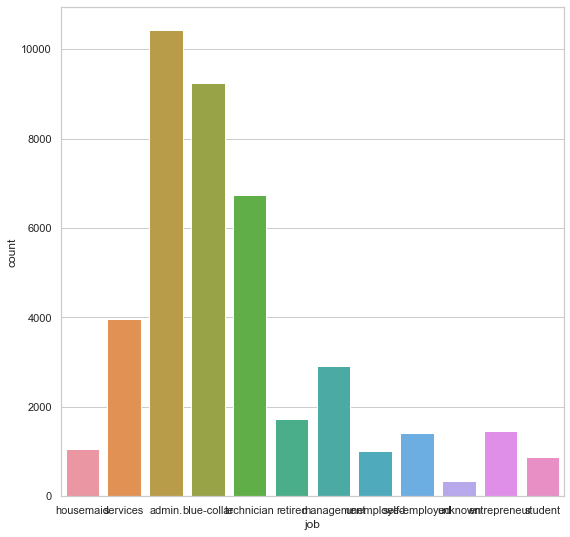

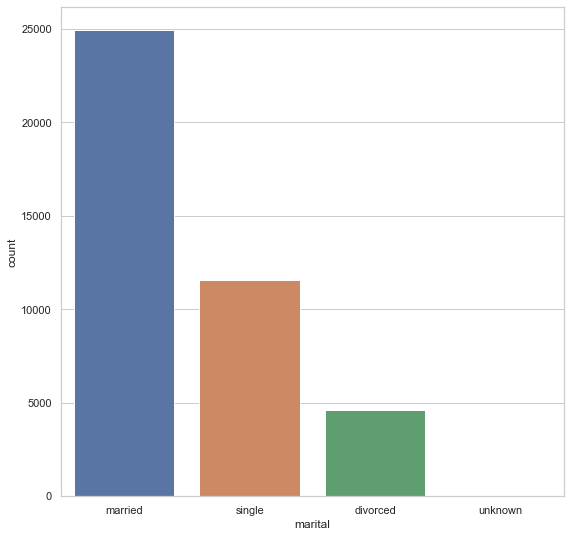

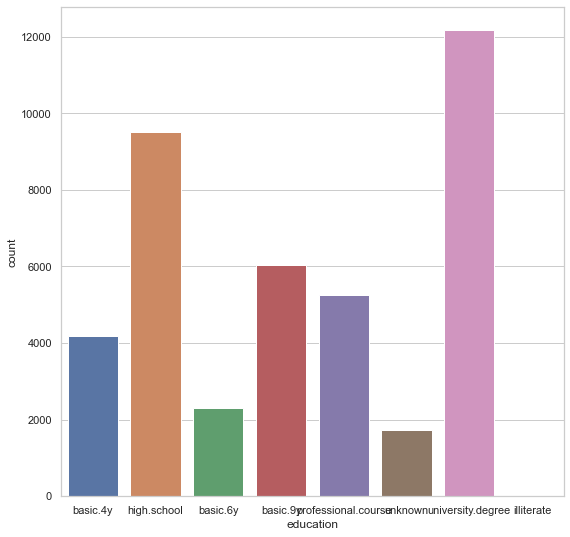

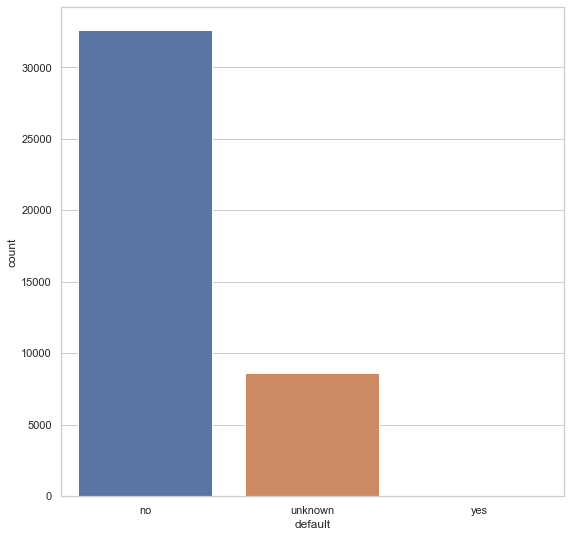

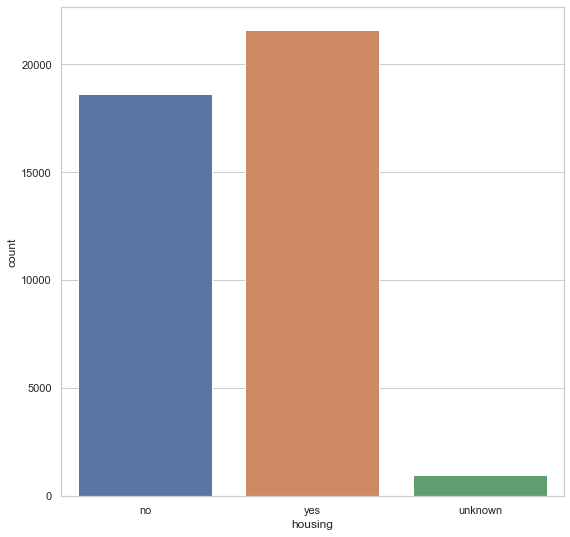

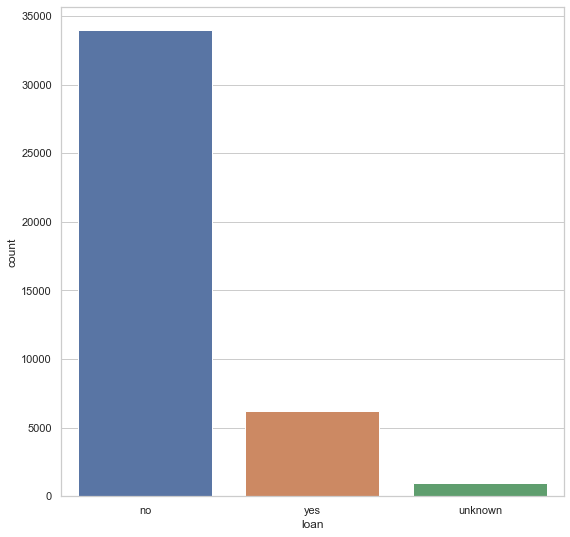

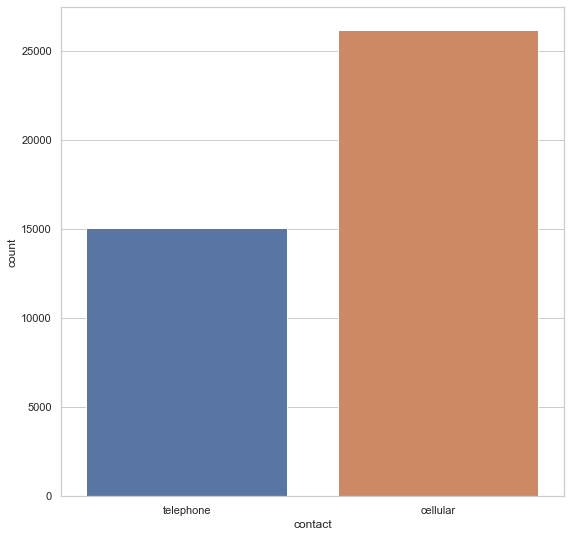

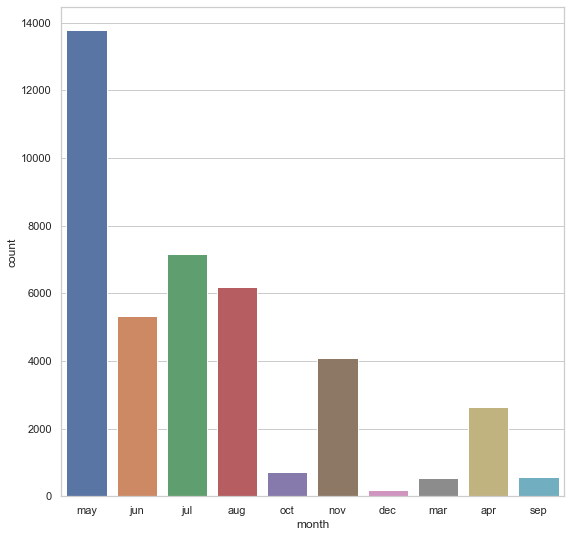

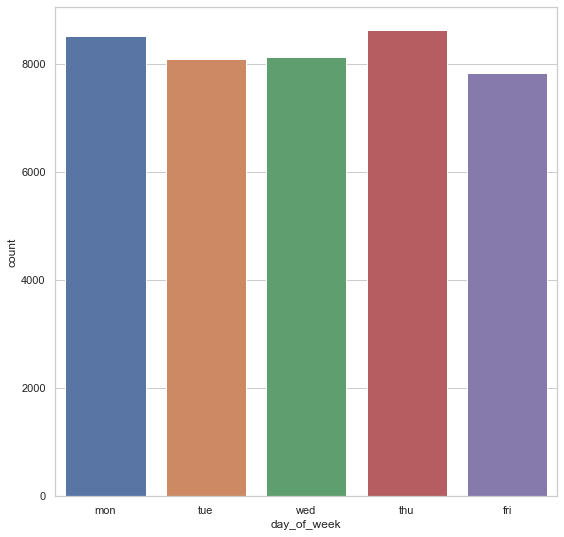

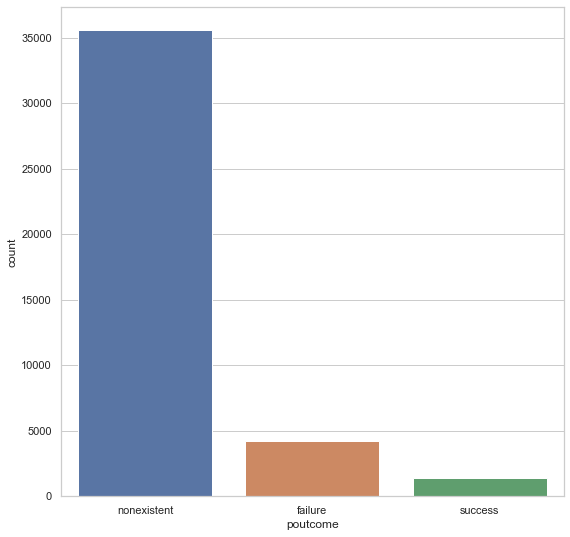

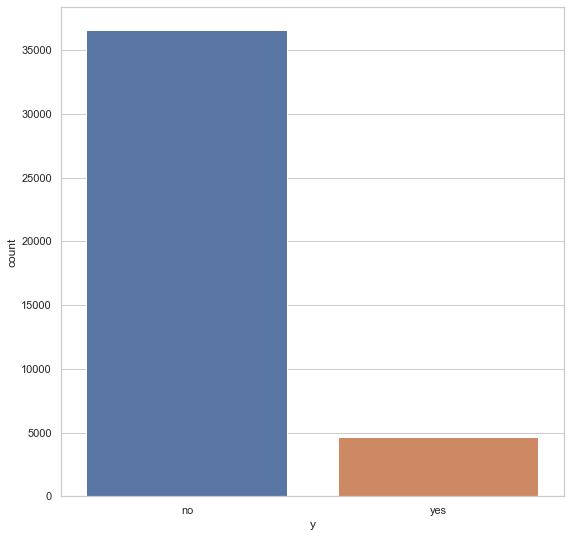

In [12]:
for c in ColumnType[ 'object']:
    print(c)
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 9)
    ax = sns.countplot(x=c, data=bank_data)

 We can see the number of clients who subscribed by examining the column 'y'.

In [13]:
CatNumber=bank_data['y'].value_counts()
CatNumber

no     36548
yes     4640
Name: y, dtype: int64

 We can convert this to a percentage

In [14]:
 (CatNumber[1]/CatNumber[0])*100

12.6956331399803

 We see that approximately 13% client subscribed

 let's create a separate vector of labels 

In [15]:
y=bank_data['y'].replace(to_replace=['no','yes'], value=[0,1])
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int64

 As we have the labels, we can drop them from the from the data matrix:

In [16]:
bank_data.drop(labels='y', axis=1,inplace=True)

 this data is bias see [1]

In [17]:
bank_data.drop(labels='duration', axis=1,inplace=True)
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


Let's see an example of how one hot one hot encoding on the feature 'marital'.

 Prior to one hot encoding:

In [18]:
bank_data['marital'].head(10)

0    married
1    married
2    married
3    married
4    married
5    married
6    married
7    married
8     single
9     single
Name: marital, dtype: object

 After One Hot Encoding:

In [19]:
pd.get_dummies(bank_data[['marital']]).head()

,marital_divorced,marital_married,marital_single,marital_unknown
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Let's group the different features into different data types 

In [20]:
g=bank_data.columns.to_series().groupby(bank_data.dtypes).groups
ColumnType ={k.name: v for k, v in g.items()}
ColumnType 

{'int64': Index(['age', 'campaign', 'pdays', 'previous'], dtype='object'),
 'float64': Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
        'nr.employed'],
       dtype='object'),
 'object': Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome'],
       dtype='object')}

The result is a dictionary, the key is the feature type and the values are the names of the features. As categorical features are of type 'object' we can obtain the names of the categorical features and assign them to the list “categorical_features_names” as follows:



In [21]:
categorical_features_names=ColumnType['object']
categorical_features_names

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

We can use the Pandas function “get_dummies” to convert the categorical features using One Hot Encoding and store the results in the Data Frame “one_hot_categorical”. 


In [22]:
one_hot_categorical=pd.get_dummies(bank_data[ColumnType['object']])
one_hot_categorical.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


We can obtain the name of numerical features of type float and integer and store them in the list “list_numerical_features” .

In [24]:
list_numerical_features=list(ColumnType['int64'])+list(ColumnType['float64'])
list_numerical_features

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

 We can store the numerical features in the Data Frame “numerical_features” as follows:

In [25]:
numerical_features=bank_data[list_numerical_features]
numerical_features.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


We can combine or concatenate the different columns to create a feature matrix X: 


In [31]:
X=pd.concat([numerical_features, one_hot_categorical], axis=1)
X.head()  

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


 We define a function to standardized the data:

In [32]:
def Norm(x):
    return((x-x.mean())/x.std())

We use the method “apply” to apply the function “Norm” to the colunms of the data.   


In [33]:
X=X.apply(Norm)

 Lets import  **train_test_split** to test our model 

In [34]:
from sklearn.model_selection import train_test_split
print("imported train_test_split ")

imported train_test_split 


Let's use 10 % of our data to test the model.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)
print('training data size:',X_train.shape[0])
print('testing data size:',X_test.shape[0])

training data size: 27458
testing data size: 13730


 we will store the results on the test data in a dictionary 

In [37]:
results_test_data={"KNN":[],"Logistic Regression":[],"SVM":[] }

# <a id="ref1"></a>K Nearest Neighbors

 Let's import the module K-Neighbors Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
print('imported ')

imported 


Let's create an instance of a K-Neighbors Classifier setting k equal to 3 ,setting the parameter  **algorithm** to 'kd_tree' speeds up the process. 


In [39]:
k = 3 
KNN= KNeighborsClassifier(n_neighbors=k,algorithm = 'kd_tree')
KNN

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

Now we fit the model 

In [40]:
startTime = time.time()

# this is where we train the model 
KNN.fit(X_train,y_train)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

time: 0.1190941333770752  sec


 Let's use our model to predict some values using the test data and save the values to yhat (should take  48 seconds ).

In [41]:
startTime = time.time()

# this is where we make the prediction  
yhat=KNN.predict(X_test)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

time: 20.542967796325684  sec


array([0, 0, 0, 0, 0])

 We can obtain the probability of each class   

In [42]:
#KNN.predict_proba(X_test)

Let's determine how accurate the model is on the test data 

In [43]:
np.mean(yhat==y_test)

0.885360524399126

 The accuracy is approximately 89.0 % , as the data set is not balanced let's use some other metrics to determine the accuracy.

 Let's look at the confusion matrix. First, we need to import it from sklearn.metrics. 

In [44]:
from sklearn.metrics import confusion_matrix
print('imported ')

imported 


 Let's create a list of target names to make the visualizations easier to understand:

In [45]:
target_names = ['not subscribed', 'subscribed ']

 we can use the default confusion matrix:

In [46]:
print("confusion matrix:")
print( confusion_matrix(yhat,y_test))

confusion matrix:
[[11722  1096]
 [  478   434]]


 this is difficult to visualise so let's use a more detailed version using  <a href="#plotmatrix">this fuction </a>

Confusion matrix, without normalization
[[11722  1096]
 [  478   434]]


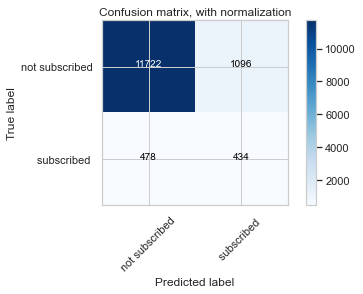

In [47]:
plot_confusion_matrix(confusion_matrix(yhat,y_test), classes=target_names,title='Confusion matrix, with normalization')

Now let's look at some other metrics using the module **metrics**. First, we must import the functions

In [48]:
from sklearn.metrics import precision_recall_fscore_support,recall_score,accuracy_score

let's calculate the metrics: precision, recall, f1 and accuracy 

In [49]:
prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
acc

0.885360524399126

 Lets store the values in the dictionary **metric_dict** and print out the values  <a href="#pretty_metrics">this fuction </a>:

In [50]:
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

accuracy 0.885360524399126
precision 0.4758771929824561
recall 0.28366013071895424
F1 0.35544635544635544


#### Grid Search

 We use **GridSearchCV** to help automate the process of finding k we can use the parameter **n_jobs=-1**  to use all the cores. First we import the function **GridSearchCV** from the module **model_selection** .

In [51]:
from sklearn.model_selection import GridSearchCV

Let's create a dictionary of hyperparameter for **k**:

In [52]:
param_grid={'n_neighbors':[1,2],'algorithm':[ 'kd_tree']}

 We create a grid search object; the first input is the object constructor of the model in this case **KNeighborsClassifier()**. The parameter cv is the number of folds, we use three in this case. The parameter param_grid is the parameter grid we defined above. Finally, the parameter scoring determines what metric the function **GridSearchCV** will used to select the optimum model hyperparameters to use.

In [53]:
grid = GridSearchCV(KNeighborsClassifier(), cv=2, param_grid=param_grid,scoring="recall",n_jobs=-1)
print("Done")

Done


We fit the object *(this may take some time so lets go back to the ppt)*

In [54]:
startTime=time.time()
# this is where we fit the model 
grid.fit(X_train,y_train)
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

time: 14.066540956497192  sec


Let's see the best Hyper parameter values

In [55]:
grid.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 1}

 we can get the best results  

In [56]:
#grid.cv_results_

 We can get the best score: 

In [57]:
grid.best_score_


0.3292604501607717

 we can obtain the model with the best parameters and assign it to the variable **KNN**

In [58]:
KNN=LR=grid.best_estimator_

We can obtain a prediction using the test data

In [59]:
startTime=time.time()
# this is where we make the prediction  
yhat=KNN.predict(X_test)


lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

time: 19.719084978103638  sec


array([1, 0, 0, 1, 0])

 We can obtain the metrics on our test data

In [60]:
prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

accuracy 0.8485797523670794
precision 0.32047089601046436
recall 0.3202614379084967
F1 0.32036613272311215


 We can get the best score and save it

In [61]:
results_test_data['KNN']=metric['recall']
results_test_data['KNN']

0.3202614379084967

### Perform the same grid search  as above using using a for loop and plot it 

 <div align="right">
<a href="#String2" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="String2" class="collapse">
```
number_neighbor=range(1,3)
metric_dict=pretty_metrics(precision_recall_fscore=0)

for k in number_neighbor:
    print( "iteration",k )
    KNN= KNeighborsClassifier(n_neighbors=k,algorithm = 'kd_tree')
    KNN.fit(X_train,y_train)
    %time
    yhat=KNN.predict(X_test)
    
    prf1=precision_recall_fscore_support(y_test,yhat)
    acc=accuracy_score(y_test,yhat)
    
    metric_dict['accuracy'].append(acc)
    metric_dict['precision'].append(prf1[0][1])
    metric_dict['recall'].append(prf1[1][1])
    metric_dict['F1'].append(prf1[2][1])

for key, value in metric_dict.items():
    plt.plot(number_neighbor,value,label=key)
plt.legend(loc='upper right')   




```
</div>


Let's delete the **KNN** object

In [62]:
del KNN


# <a id="ref2"></a>  Logistic regression

Let's import **LogisticRegression**  from the module **linear_model** .

In [63]:
from sklearn.linear_model import LogisticRegression

 Let's build our model:

In [64]:
LR = LogisticRegression(C=0.01)
LR

LogisticRegression(C=0.01)

 Let's fit our model 

In [65]:
startTime=time.time()
# this is where we fit the model 
LR.fit(X_train,y_train)
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

time: 0.09560894966125488  sec


 we can generate  a prediction 

In [66]:
startTime=time.time()
# this is where we make the prediction  
yhat=LR.predict(X_test)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

yhat[0:5]

time: 0.002763032913208008  sec


array([0, 0, 0, 0, 0])

 we can calculate the average accuracy using  the test data 

In [67]:
np.mean(y_test==yhat)

0.8998543335761107

#### Grid Search

Let's create a dictionary of hyperparameters and their values. The term **C** will be the parameter that controls the inverse of the regularisation strength. **Penalty** is the type of penalty term used for regularisation.

In [68]:
param_grid={'C':[0.001,0.01,0.1],'penalty':["l1", "l2"]}

 We create a grid search object; the first input is the object constructor of the model in this case **LogisticRegression()**. The parameter cv is the number of folds, we use three in this case. The parameter param_grid is the parameter grid we defined above. Finally, the parameter scoring determines what metric the function GridSearchCV will used to select the optimum model hyperparameters to use.

In [69]:
grid = GridSearchCV(LogisticRegression(), cv=3, param_grid=param_grid,scoring="recall",n_jobs=-1)
print("Done")

Done


In [70]:
startTime=time.time()
# this is where we fit the model 
grid.fit(X_train,y_train)
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueE

time: 1.334219217300415  sec


 The attribute **cv_results_** outputs a dictionary that includes different values of how long fitting and testing took and the training and testing score for the different folds. 

In [71]:
#grid.cv_results_

Let's see the best Hyper parameter values 

In [72]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

 We can get the best value for the score as follow:

In [73]:
grid.best_score_

0.23312036378574472

we can obtain the model with the best parameters and assign it to the variable **LR**


In [74]:
LR=grid.best_estimator_
LR

LogisticRegression(C=0.1)

 We can obtain a prediction using the test data


In [75]:
yhat=LR.predict(X_test)
yhat[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

 We can obtain the metrics on our test data  

In [76]:
prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

accuracy 0.899781500364166
precision 0.6447368421052632
recall 0.22418300653594772
F1 0.3326867119301649


Let’s Store the best result of the test data in the dictionary results_test_data.

In [77]:
results_test_data['Logistic Regression']=metric['recall']
results_test_data

{'KNN': 0.3202614379084967,
 'Logistic Regression': 0.22418300653594772,
 'SVM': []}

 Let's create a Confusion matrix 

Confusion matrix, without normalization
[[12011  1187]
 [  189   343]]


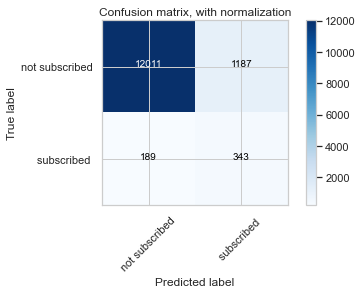

In [78]:
plot_confusion_matrix(confusion_matrix(yhat,y_test), classes=target_names,title='Confusion matrix, with normalization')

 Let's delete the objects for speed

In [79]:
del LR
del grid

# <a id="ref1"></a> Support Vector Machines 

Let’s import Support Vector Classification (**SVC**) from the module Support Vector Machines  (**SVM**)

In [80]:
from sklearn.svm import SVC

We create a **SVC** object using the constructor, using the RBF kernel; setting the regularization term equal to one. The rest of the parameters will be set using the default settings.  


In [81]:
SVM=SVC(C=1.0, kernel='rbf',cache_size=600)

let's fit the model (this make take some time so lets go back to the lecture) 

In [82]:
startTime=time.time()
# this is where we fit the model  
SVM.fit(X_train,y_train)
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

time: 28.944663047790527  sec


 We can produce a prediction on our test set (this may take some time):

In [83]:
startTime=time.time()
# this is where we fit the model  
yhat=SVM.predict(X_test)
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

time: 18.24996304512024  sec


array([0, 0, 0, 0, 0])

 we can calculate our metrics 

In [84]:
prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

accuracy 0.8974508375819373
precision 0.6113138686131386
recall 0.21895424836601307
F1 0.3224254090471607


In [85]:
results_test_data['SVM']=metric['recall']

 Testing Parameters will take a long time; let's try LinearSVC that runs faster. First we import the model 

In [86]:
from sklearn.svm import  LinearSVC

Let's create a dictionary of hyperparameters and their values:

In [87]:
param_grid = [{'C': [0.01,0.1 ,1, 10 ]}]

In [88]:
grid = GridSearchCV(LinearSVC(), cv=3, param_grid=param_grid,scoring="precision",n_jobs=-1)
grid

GridSearchCV(cv=3, estimator=LinearSVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10]}], scoring='precision')

In [89]:
startTime=time.time()
# this is where we fit the model 
grid.fit(X_train,y_train)
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

time: 24.397766828536987  sec


In [90]:
grid.best_params_

{'C': 0.01}

In [91]:
SVM=grid.best_estimator_

In [92]:
yhat=SVM.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [93]:
prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

accuracy 0.8993445010924982
precision 0.647410358565737
recall 0.21241830065359477
F1 0.3198818897637795


### Let’s look at the results on the test data 

In [94]:
results_test_data

{'KNN': 0.3202614379084967,
 'Logistic Regression': 0.22418300653594772,
 'SVM': 0.21895424836601307}

### About the Authors:  

 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

#### References   

 Moro, Sérgio, Paulo Cortez, and Paulo Rita. "A data-driven approach to predict the success of bank telemarketing." Decision Support Systems 62 (2014): 22-31.
